# Simple Linear Regression Model 
Predict weight

# Method 1: Mathematically with numpy

From dataset, predict the weight of person with height: 155, 160, 165 cm

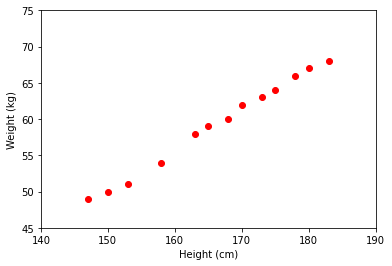

In [34]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
# Create height vector
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# Create weight vector
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize dataset
plt.plot(X,y,"ro")
plt.axis([140,190,45,75]) #Adjust x,y axis value
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [38]:
# Mathematically, the optimal value of LR is w = A^{-1}B [with A = X(T).X and B = X(T)y)]
# y = Xbar . w 
# Create vecto
one = np.ones((X.shape[0], 1)) #Numpy ones: Create matrix with all the elements equal to 1 with the size adjusted
Xbar = np.concatenate((one, X), axis = 1) #Create Xbar vecto (n row, 2 cols: 1, xi)
print(Xbar) 

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [40]:
#Calculate 
A = np.dot(Xbar.T,Xbar)
B = np.dot(Xbar.T,y)
w = np.dot(np.linalg.pinv(A),B)
print(w)
# w0 = -33.73541021, w1 = 0.55920496


[[-33.73541021]
 [  0.55920496]]


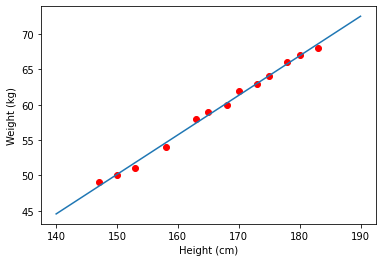

In [47]:
#Visualize the fitting line
w0 = w[0][0]
w1 = w[1][0]
x0 = np.linspace(140,190,num = 2)
y0 = w0 + w1*x0
plt.plot(X,y,"ro")
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.plot(x0,y0)

In [63]:
#Predict
test = np.array([[155],[160],[165]])
ones = np.ones((test.shape[0],1))
x_predict = np.concatenate((ones, test), axis = 1)
y_predict = np.dot(x_predict,w)
print(u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y_predict[0]))
print(u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y_predict[1]))
print(u'Predict weight of person with height 160 cm: %.2f (kg)'  %(y_predict[2]))

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)
Predict weight of person with height 160 cm: 58.53 (kg)


# Method 2: Using Scikit-learn library

In [70]:
from sklearn import datasets, linear_model
reg = linear_model.LinearRegression(fit_intercept = False)
reg.fit(Xbar,y)
print( 'Solution found by scikit-learn  : ', reg.coef_ )
w_lib = reg.coef_
test = np.array([[155],[160],[165]])
ones = np.ones((test.shape[0],1))
x_predict = np.concatenate((ones, test), axis = 1)
y_predict = np.dot(x_predict,w_lib.T)
print(u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y_predict[0]))
print(u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y_predict[1]))
print(u'Predict weight of person with height 160 cm: %.2f (kg)'  %(y_predict[2]))

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)
Predict weight of person with height 160 cm: 58.53 (kg)
